In [1]:
import pandas as pd

#read from csv
df=pd.read_csv("foodprice_processed_ph_1.csv")
df

,latitude,longitude,price,cereals and tubers,"meat, fish and eggs",vegetables and fruits,pulses and nuts,miscellaneous food,oil and fats,2000,...,m6,m7,m8,m9,m10,m11,m12,KG,Unit,750 ML
0,14.604167,120.982222,15.00,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,14.604167,120.982222,20.00,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,14.604167,120.982222,18.35,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,14.604167,120.982222,18.00,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,14.604167,120.982222,16.35,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107349,8.957268,125.534029,114.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
107350,8.957268,125.534029,106.67,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
107351,8.957268,125.534029,114.17,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
107352,8.957268,125.534029,45.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [2]:
X=df.drop(labels='price',axis=1)
Y=df['price']

In [3]:
X.shape

(107354, 251)

Region VI               0.952872
Lanao del Norte         0.909126
Naga City               0.809659
Mangoes (piko)          0.771470
Cagayan                 0.749789
Sulu                    0.658944
Cotabato City           0.626150
Camiguin                0.622816
Davao del Sur           0.619912
Apayao                  0.547377
Onions (red)            0.530493
Butuan City             0.512703
Tacloban City           0.494361
Misamis Oriental        0.484737
m10                     0.413131
actual,aggregate        0.406189
Garlic (large)          0.329394
Misamis Occidental      0.315219
South Cotabato          0.274252
Batangas City           0.258386
Groundnuts (shelled)    0.235714
Basilan                 0.199008
Kalinga                 0.155236
Aklan                   0.148123
Compostela Valley       0.147787
Davao de Oro            0.147787
Dinagat Islands         0.139441
Ifugao                  0.126790
Region II               0.123875
Cabanatuan City         0.121581
Baguio Cit

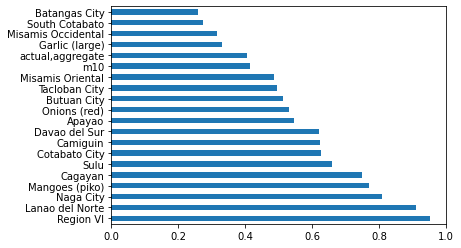

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
fs.fit_transform(X, Y)

feat_importances = pd.Series(fs.pvalues_, index=X.columns)
print(feat_importances.nlargest(60))
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print("Score",reg.score(X_test, y_test))
y_predict = reg.predict(X_test)

Score 0.8818170497338924


In [8]:
import math
def accuracy(pred,test):
  cnt=0
  length=len(pred)
  for i in range (length):
    addv=math.ceil(pred[i]+(pred[i]*50/100))
    subv=math.ceil(pred[i]-(pred[i]*50/100))

    if(pred[i]==test[i]):
      cnt+=1
    elif(test[i]>=pred[i] and test[i]<=addv):
      cnt+=1
    elif(test[i]<=pred[i] and test[i]>=subv):
      cnt+=1
  
  acc=cnt/length
  return acc

In [9]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pred = np.ceil(y_predict)
test= np.ceil(y_test.values)
comp=pd.DataFrame(pred,test)
acc=accuracy(pred,test)
print(acc*100,"%")


86.60531316367972 %
